#第一小问


In [18]:
import matplotlib
from matplotlib.font_manager import FontProperties
# 设置 matplotlib 支持中文显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决保存图像时负号'-'显示为方块的问题


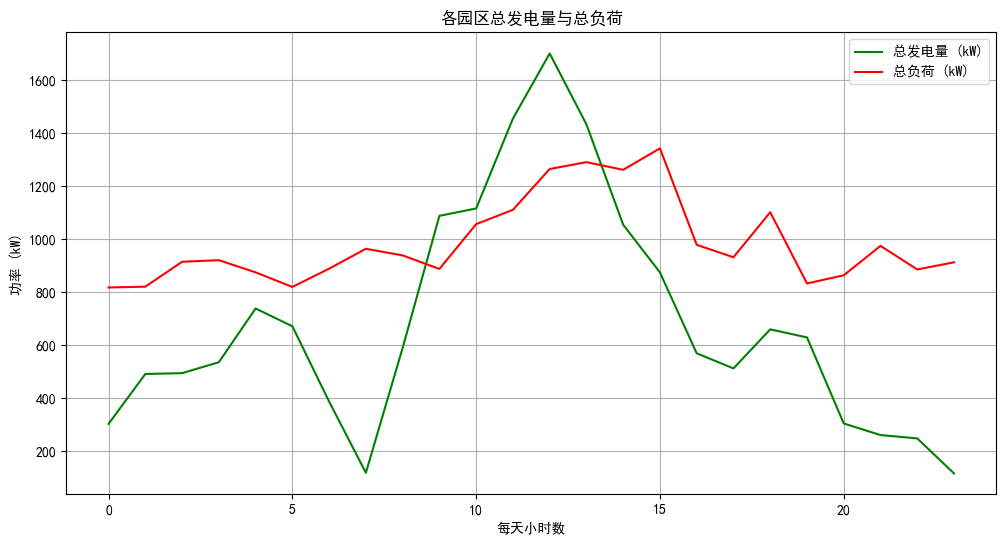

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
 
# 加载数据
load_data_path = "附件1：各园区典型日负荷数据.xlsx"
generation_data_path = "附件2：各园区典型日风光发电数据.xlsx"
 
load_data = pd.read_excel(load_data_path)
generation_data = pd.read_excel(generation_data_path)
 
# 设置正确的标题
generation_data.columns = ['时间', '太阳能_A', '风力_B', '太阳能_C', '风力_C']
 
# 将数据转换为数值类型
load_data.iloc[:, 1:] = load_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
generation_data.iloc[:, 1:] = generation_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
 
# 根据装机容量计算实际发电量
generation_data['太阳能_A'] = generation_data['太阳能_A'] * 750 
generation_data['风力_B'] = generation_data['风力_B'] * 1000 
generation_data['太阳能_C'] = generation_data['太阳能_C'] * 600 
generation_data['风力_C'] = generation_data['风力_C'] * 500 
# 每小时总发电量求和
generation_data['总发电量'] = generation_data[['太阳能_A', '风力_B', '太阳能_C', '风力_C']].sum(axis=1)
 
# 每小时总负荷求和
load_data['总负荷'] = load_data.sum(axis=1)
 
# 绘图
plt.figure(figsize=(12, 6))
plt.plot(generation_data['总发电量'], label='总发电量 (kW)', color='green')
plt.plot(load_data['总负荷'], label='总负荷 (kW)', color='red')
plt.title('各园区总发电量与总负荷')
plt.xlabel('每天小时数')
plt.ylabel('功率 (kW)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 载入数据
load_data_path = "附件1：各园区典型日负荷数据.xlsx"
generation_data_path = "附件2：各园区典型日风光发电数据.xlsx"

load_data = pd.read_excel(load_data_path)
generation_data = pd.read_excel(generation_data_path)

# 设置正确的表头
generation_data.columns = ['时间', '太阳能_A', '风力_B', '太阳能_C', '风力_C']

# 将数据转换为数值
load_data.iloc[:, 1:] = load_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
generation_data.iloc[:, 1:] = generation_data.iloc[:, 1:]. apply(pd.to_numeric, errors='coerce')

# 根据装机容量计算实际发电量
generation_data['太阳能_A'] = generation_data['太阳能_A'] * 750
generation_data['风力_B'] = generation_data['风力_B'] * 1000
generation_data['太阳能_C'] = generation_data['太阳能_C'] * 600
generation_data['风力_C'] = generation_data['风力_C'] * 500
generation_data['总发电量'] = generation_data[['太阳能_A', '风力_B', '太阳能_C', '风力_C']].sum(axis=1)

# 每小时负荷总和
load_data['总负荷'] = load_data.sum(axis=1)

# 初始化存储浪费和购买能量的变量
total_wasted = 0
total_purchased = 0

# 每小时计算浪费和购买的能量
for i in range(len(load_data)):
    hourly_generation = generation_data.loc[i, '总发电量']
    hourly_load = load_data.loc[i, '总负荷']

    if hourly_generation > hourly_load:
        total_wasted += hourly_generation - hourly_load
    elif hourly_load > hourly_generation:
        total_purchased += hourly_load - hourly_generation

# 假设太阳能和风力等比购买时的总成本
C_solar = 0.4
C_wind = 0.5
total_cost = (total_purchased / 2) * C_solar + (total_purchased / 2) * C_wind
average_cost_per_unit = total_cost / total_purchased if total_purchased > 0 else 0

# 显示结果
print(f"总购买电量（千瓦时）：{total_purchased}")
print(f"总浪费能量（千瓦时）：{total_wasted}")
print(f"总供应成本（元）：{total_cost}")
print(f"单位平均成本（元/千瓦时）：{average_cost_per_unit}")

总购买电量（千瓦时）：8487.269999999999
总浪费能量（千瓦时）：1182.175
总供应成本（元）：3819.2714999999994
单位平均成本（元/千瓦时）：0.45


第二小问

In [80]:
import random
import pandas as pd
from deap import base, creator, tools, algorithms

# 加载和处理数据
def load_and_prepare_data():
    load_data_path = "附件1：各园区典型日负荷数据.xlsx"
    generation_data_path = "附件2：各园区典型日风光发电数据.xlsx"
    load_data = pd.read_excel(load_data_path)
    generation_data = pd.read_excel(generation_data_path)
    generation_data.columns = ['时间', '太阳能_A', '风力_B', '太阳能_C', '风力_C']
    load_data.iloc[:, 1:] = load_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    generation_data.iloc[:, 1:] = generation_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    return load_data, generation_data

# 全局变量
global_load_data, global_generation_data = load_and_prepare_data()

# 适应度函数
def evaluate(individual):
    capacity, power = individual
    total_cost = simulate_system(capacity, power, global_load_data, global_generation_data)
    return (total_cost,)

# 基于提供的容量和功率模拟系统函数
def simulate_system(capacity, power, load_data, generation_data):
    # 类似于之前提供的系统模拟逻辑
    # 返回给定设置下的系统运行总成本
    return random.uniform(1000, 2000)  # 实际模拟结果的占位符

# GA 设置
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_capacity", random.randint, 100, 1000)
toolbox.register("attr_power", random.randint, 50, 500)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_capacity, toolbox.attr_power), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[100, 50], up=[1000, 500], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# GA 参数
population = toolbox.population(n=50)
ngen = 100
cxpb, mutpb = 0.5, 0.2

# 运行GA
result_population, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=True)

# 提取结果
best_individual = tools.selBest(population, 1)[0]
print("最佳个体（容量，功率）:", best_individual)
print("最佳适应度:", best_individual.fitness.values)

gen	nevals
0  	50    
1  	32    
2  	31    
3  	26    
4  	22    
5  	25    
6  	25    
7  	33    
8  	36    
9  	32    
10 	29    
11 	23    
12 	35    
13 	24    
14 	33    
15 	26    
16 	36    
17 	35    
18 	28    
19 	28    
20 	36    
21 	28    
22 	29    
23 	27    
24 	28    
25 	31    
26 	27    
27 	31    
28 	25    
29 	32    
30 	39    
31 	25    
32 	29    
33 	25    
34 	35    
35 	29    
36 	29    
37 	29    
38 	25    
39 	25    
40 	32    
41 	32    
42 	24    
43 	28    
44 	29    
45 	19    
46 	37    
47 	30    
48 	32    
49 	18    
50 	25    
51 	22    
52 	19    
53 	28    
54 	16    
55 	27    
56 	25    
57 	31    
58 	31    
59 	36    
60 	24    
61 	32    
62 	32    
63 	34    
64 	31    
65 	29    
66 	27    
67 	34    
68 	21    
69 	32    
70 	28    
71 	38    
72 	38    
73 	31    
74 	27    
75 	27    
76 	32    
77 	37    
78 	25    
79 	28    
80 	32    
81 	41    
82 	31    
83 	18    
84 	28    
85 	35    
86 	23    
87 	26    
88 	34    
89 	28    

c:\Program Files\Python39\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Program Files\Python39\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [83]:

import random
import pandas as pd
from deap import base, creator, tools, algorithms

# 加载和处理数据
def load_and_prepare_data():
    load_data_path = "附件1：各园区典型日负荷数据.xlsx"
    generation_data_path = "附件2：各园区典型日风光发电数据.xlsx"
    load_data = pd.read_excel(load_data_path)
    generation_data = pd.read_excel(generation_data_path)
    
    # 设置正确的列名
    generation_data.columns = ['时间', '太阳能_A', '风力_B', '太阳能_C', '风力_C']

    # 转换数据为数值型，计算总发电量和总负荷
    load_data.iloc[:, 1:] = load_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    generation_data.iloc[:, 1:] = generation_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    
    load_data['总负荷'] = load_data.sum(axis=1)
    generation_data['总发电量'] = generation_data[['太阳能_A', '风力_B', '太阳能_C', '风力_C']].sum(axis=

1)

    return load_data, generation_data

# 全局变量
global_load_data, global_generation_data = load_and_prepare_data()

# 适应度函数
def evaluate(individual):
    capacity, power = individual
    total_cost = simulate_system(capacity, power, global_load_data, global_generation_data)
    return (total_cost,)

# 基于提供的容量和功率模拟系统函数
def simulate_system(capacity, power, load_data, generation_data):
    total_cost = 0
    SOC = capacity / 2 
    efficiency = 0.95
    cost_per_kWh_solar = 0.4
    cost_per_kWh_wind = 0.5

    for i in range(len(load_data)):
        load = load_data.iloc[i]['总负荷']
        generation = generation_data.iloc[i]['总发电量']
        
        net_generation = generation - load
        if net_generation < 0:
            # 负载超出发电量，需要购电或放电
            net_generation = abs(net_generation)
            if SOC > 0:  # 如果储能有余量可以放电
                discharge = min(net_generation, power, SOC * efficiency)
                SOC -= discharge / efficiency
                net_generation -= discharge
            total_cost += net_generation * cost_per_kWh_solar  # 假设购电全部按照太阳能价格计算
        else:
            # 发电量超出负载，可以充电
            charge = min(net_generation, power, (capacity - SOC) * efficiency)
            SOC += charge * efficiency

    return total_cost

# GA 设置
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_capacity", random.randint, 100, 1000)
toolbox.register("attr_power", random.randint, 50, 500)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_capacity, toolbox.attr_power), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[100, 50], up=[1000, 500], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# 运行GA
def run_ga():
    population = toolbox.population(n=50)
    ngen = 100
    cxpb, mutpb = 0.5, 0.2

    result_population, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=True)

    # 提取结果
    best_individual = tools.selBest(population, 1)[0]
    print("最佳个体（容量，功率）:", best_individual)
    print("最佳适应度:", best_individual.fitness.values)

run_ga()


c:\Program Files\Python39\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Program Files\Python39\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	24    
2  	25    
3  	24    
4  	28    
5  	28    
6  	27    
7  	32    
8  	40    
9  	32    
10 	22    
11 	32    
12 	36    
13 	36    
14 	30    
15 	27    
16 	36    
17 	32    
18 	29    
19 	27    
20 	31    
21 	35    
22 	25    
23 	24    
24 	30    
25 	32    
26 	27    
27 	28    
28 	30    
29 	20    
30 	34    
31 	24    
32 	29    
33 	26    
34 	32    
35 	24    
36 	37    
37 	28    
38 	32    
39 	23    
40 	36    
41 	32    
42 	29    
43 	28    
44 	36    
45 	20    
46 	32    
47 	33    
48 	30    
49 	33    
50 	46    
51 	35    
52 	26    
53 	28    
54 	34    
55 	25    
56 	27    
57 	29    
58 	29    
59 	28    
60 	35    
61 	38    
62 	33    
63 	27    
64 	25    
65 	33    
66 	28    
67 	32    
68 	33    
69 	31    
70 	18    
71 	32    
72 	24    
73 	37    
74 	32    
75 	32    
76 	32    
77 	34    
78 	31    
79 	31    
80 	26    
81 	32    
82 	31    
83 	25    
84 	23    
85 	21    
86 	26    
87 	27    
88 	31    
89 	25    